In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir_path = "gdrive/My Drive/WEC/"

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


gdrive/My Drive/WEC/american_sign_language.PNG
gdrive/My Drive/WEC/amer_sign3.png
gdrive/My Drive/WEC/amer_sign2.png
gdrive/My Drive/WEC/sign_mnist_test.csv
gdrive/My Drive/WEC/sign_mnist_train.csv
gdrive/My Drive/WEC/greyscale.jpg
gdrive/My Drive/WEC/test_scenario_1.jpg
gdrive/My Drive/WEC/test_scenario_2.jpg
gdrive/My Drive/WEC/test_scenario_3.jpg
gdrive/My Drive/WEC/test_scenario_4.jpg
gdrive/My Drive/WEC/x.jpg
gdrive/My Drive/WEC/j.jpg
gdrive/My Drive/WEC/test_scenario_5.jpg
gdrive/My Drive/WEC/saved_model.pb
gdrive/My Drive/WEC/grayX.jpg
gdrive/My Drive/WEC/temp_try_1.jpg
gdrive/My Drive/WEC/temp.jpg
gdrive/My Drive/WEC/hand_2.jpg
gdrive/My Drive/WEC/hand_3.jpg
gdrive/My Drive/WEC/hand_4.jpg
gdrive/My Drive/WEC/hand_5.jpg
gdrive/My Drive/WEC/hand_6.jpg
gdrive/My Drive/WEC/sign_mnist_test/sign_mnist_test.csv
gdrive/My Drive/WEC/sign_mnist_train/sign_mnist_train.csv
gdrive/My Drive/WEC/variables/variables.index
gdrive/My Drive/WEC/variables/variables.data-00000-of-00001
gdrive/My Dr

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [ ]:
train_df = pd.read_csv(dir_path + "sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv(dir_path + "sign_mnist_test/sign_mnist_test.csv")

In [ ]:
test = pd.read_csv(dir_path + "sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


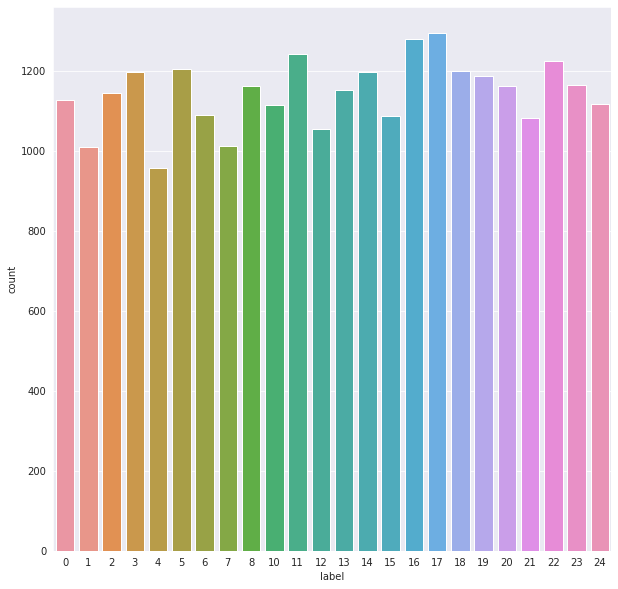

In [ ]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])
# nums = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# for x in train_df['label']:
#   nums[x-1]+=1
# print(nums)

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

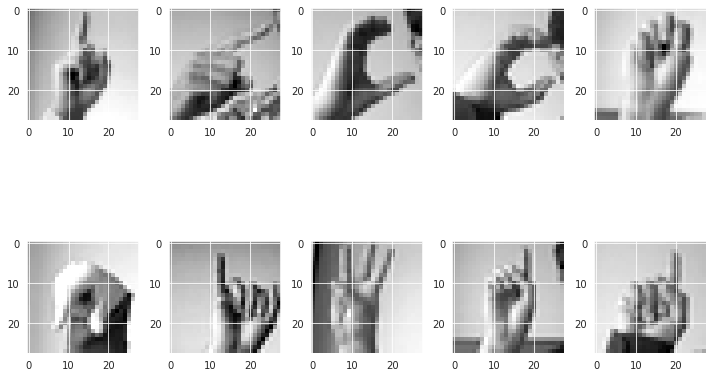

In [ ]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False) 

datagen.fit(x_train)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 95s 440ms/step - loss: 1.8857 - accuracy: 0.4416 - val_loss: 4.2368 - val_accuracy: 0.0697
Epoch 2/20
215/215 [==============================] - 93s 435ms/step - loss: 0.2770 - accuracy: 0.9084 - val_loss: 1.7466 - val_accuracy: 0.4639
Epoch 3/20
215/215 [==============================] - 94s 436ms/step - loss: 0.1209 - accuracy: 0.9606 - val_loss: 0.1130 - val_accuracy: 0.9664
Epoch 4/20
215/215 [==============================] - 94s 439ms/step - loss: 0.0753 - accuracy: 0.9747 - val_loss: 0.0714 - val_accuracy: 0.9791
Epoch 5/20
215/215 [==============================] - 94s 439ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 6/20
215/215 [==============================] - 94s 438ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0401 - val_accuracy: 0.9841
Epoch 7/20
215/215 [==============================] - 94s 437ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0451 - val_ac

In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 23ms/step - loss: 0.0115 - accuracy: 0.9974
Accuracy of the model is -  99.7350811958313 %


[0.6480786800384521, 0.9251137971878052, 0.9658349752426147, 0.9783281683921814, 0.9855763912200928, 0.9886359572410583, 0.9911856055259705, 0.9949371814727783, 0.9962848424911499, 0.9962848424911499, 0.9973046779632568, 0.9968311786651611, 0.9975960850715637, 0.9979967474937439, 0.9986159205436707, 0.9982516765594482, 0.9982152581214905, 0.9988709092140198, 0.9985795021057129, 0.9991622567176819]
[0.06971555948257446, 0.4638873338699341, 0.9663971066474915, 0.9790853261947632, 0.9927495718002319, 0.9841048717498779, 0.9822922348976135, 0.9868934750556946, 0.9952593445777893, 0.9972113966941833, 0.9972113966941833, 0.9818739295005798, 0.9974902272224426, 0.9959564805030823, 0.9979085326194763, 0.997350811958313, 0.995677649974823, 0.99832683801651, 0.9998605847358704, 0.997350811958313]
[1.1184262037277222, 0.22804252803325653, 0.1072787493467331, 0.06625058501958847, 0.04713044315576553, 0.03613049536943436, 0.027568712830543518, 0.017240561544895172, 0.0129876509308815, 0.01205674465

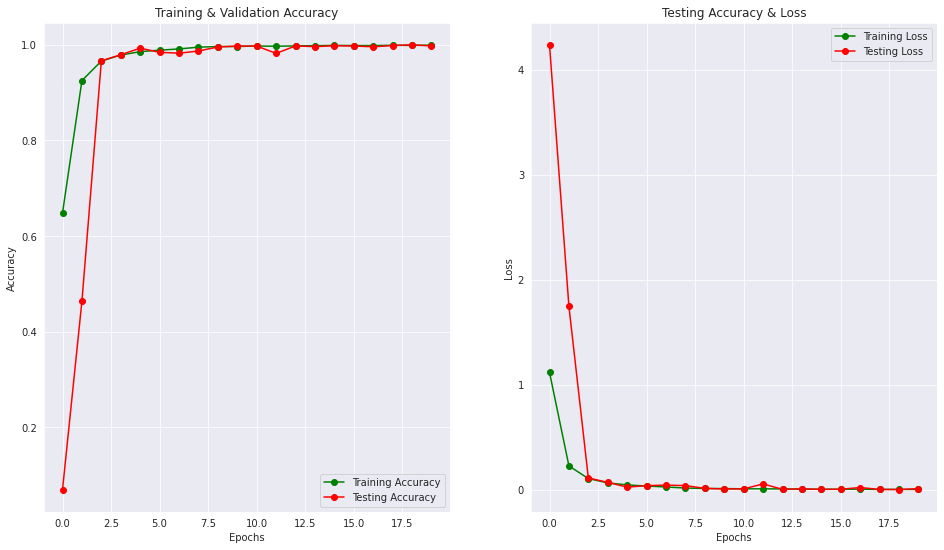

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)
print(train_acc)
print(val_acc)
print(train_loss)
print(val_loss)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]         

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 6,  5, 10,  0,  3])

In [ ]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      0.95      0.97       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.96      1.00      0.98       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [ ]:
cm = confusion_matrix(y,predictions)

In [ ]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

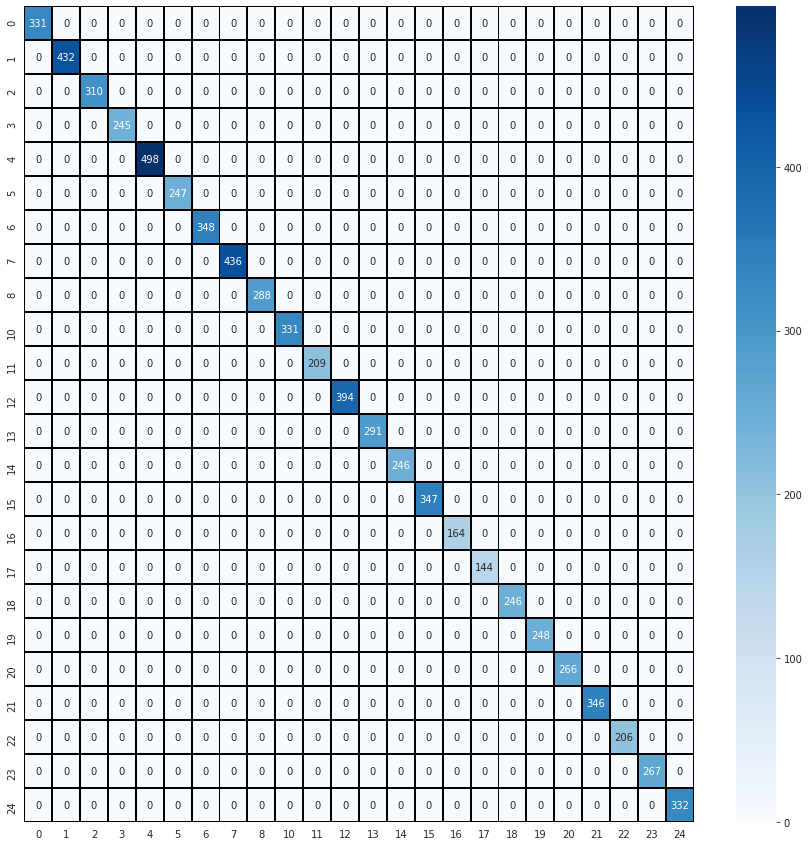

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
print(predictions)
# correct = np.to_numpy(predictions).nonzero()[0]

[ 6  5 10 ...  2  4  2]


In [ ]:
model.save(dir_path)

INFO:tensorflow:Assets written to: gdrive/My Drive/WEC/assets


In [ ]:
from tensorflow.keras.models import load_model
model = load_model(dir_path)

In [ ]:
import cv2
image = cv2.imread(dir_path + "hand_6.jpg", cv2.IMREAD_GRAYSCALE)
image.shape

(480, 480)

In [ ]:
resized_image = cv2.resize(image, (28, 28)).reshape(-1,28,28,1)
resized_image.shape
resized_image = resized_image / 255.0

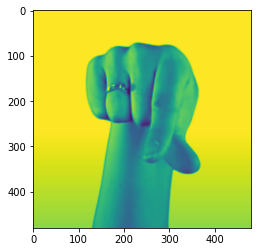

In [ ]:
plt.imshow(image)

In [ ]:

# predictions = model.predict_classes(image)
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
prediction = model.predict_classes(resized_image)
print(prediction)
letters[prediction[0]]

[1]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'B'